In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns

sns.set_theme()

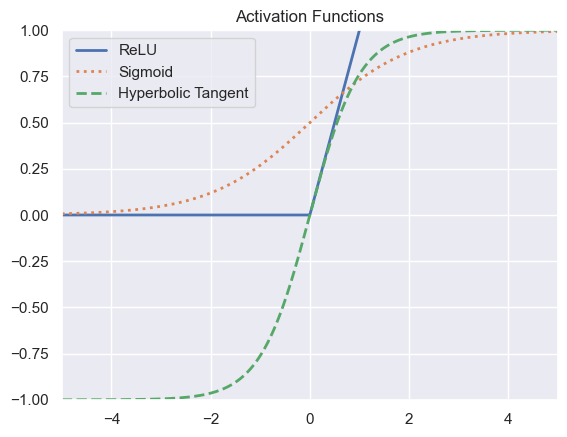

In [2]:
x = np.linspace(-5.0, 5.0, 1000)
y_relu = np.maximum(0.0, x)
y_sigmoid = 1 / (1 + np.exp(-x))
y_tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

fig, ax = plt.subplots()

ax.set_title('Activation Functions')
ax.plot(x, y_relu, linewidth=2.0, label='ReLU')
ax.plot(x, y_sigmoid, ':', linewidth=2.0, label='Sigmoid')
ax.plot(x, y_tanh, '--', linewidth=2.0, label='Hyperbolic Tangent')

ax.legend()
ax.set_xbound(-5, 5)
ax.set_ybound(-1, 1)
plt.savefig('results/activation_functions.pdf')

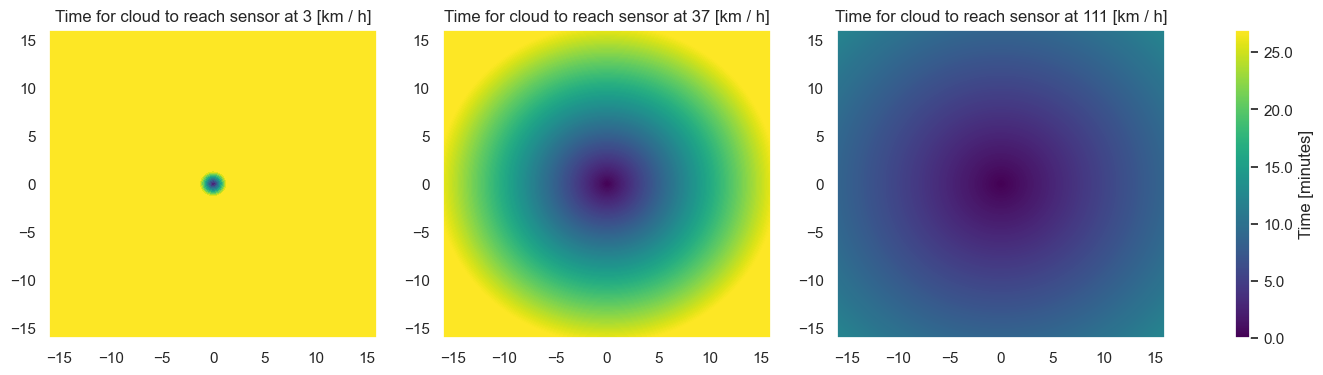

In [3]:
from typing import List
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import Normalize
import math


def plot_cloud_escape(radius_km:float, cloud_speeds_kmh:List[float]):
    fig, axs = plt.subplots(figsize=(6 * len(cloud_speeds_kmh), 4), ncols=len(cloud_speeds_kmh))
    cmap = colormaps['viridis']
    normalizer = Normalize(0, math.sqrt(radius_km**2 + radius_km**2) / np.mean(cloud_speeds_kmh) * 60)
    im = ScalarMappable(norm=normalizer, cmap=cmap)
    for i, cloud_speed_kmh in enumerate(cloud_speeds_kmh):
        ax: plt.Axes = axs[i]
        X, Y = np.meshgrid(np.linspace(-radius_km, radius_km, 256), np.linspace(-radius_km, radius_km, 256))
        length = np.sqrt(X**2 + Y**2)
        Z = length / cloud_speed_kmh * 60
        levels = np.linspace(Z.min(), Z.max(), 200)
        contour = ax.contourf(X, Y, Z, levels=levels, cmap=cmap,norm=normalizer)
        ax.set_title(f'Time for cloud to reach sensor at {cloud_speed_kmh} [km / h]')
    cbar = fig.colorbar(im, ax=axs.ravel().tolist())
    cbar.ax.set_ylabel('Time [minutes]')
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plot_cloud_escape(16, [3, 37, 111])